<a href="https://colab.research.google.com/github/AlejandroVasquez3/DDDS-My-Projects/blob/main/Project-3/SQL_1_Chinook_project_Final_Rev01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project SQL - Chinook


## Chinook data set

See the lecture on SQLite3 using the Chinook data set to set up the software, database, and tables, as well as for the links to ancillary information about the data set.


In [11]:
import sqlite3 as db
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
%%capture
%%bash
apt-get update
apt-get install -y sqlite3

In [13]:
%%bash
[ -f chinook.zip ] ||
  curl -s -O https://www.sqlitetutorial.net/wp-content/uploads/2018/03/chinook.zip
unzip -l chinook.zip


Archive:  chinook.zip
  Length      Date    Time    Name
---------  ---------- -----   ----
   884736  2015-11-29 10:53   chinook.db
---------                     -------
   884736                     1 file


In [14]:
!sqlite3 --help

Usage: sqlite3 [OPTIONS] FILENAME [SQL]
FILENAME is the name of an SQLite database. A new database is created
if the file does not previously exist.
OPTIONS include:
   -A ARGS...           run ".archive ARGS" and exit
   -append              append the database to the end of the file
   -ascii               set output mode to 'ascii'
   -bail                stop after hitting an error
   -batch               force batch I/O
   -box                 set output mode to 'box'
   -column              set output mode to 'column'
   -cmd COMMAND         run "COMMAND" before reading stdin
   -csv                 set output mode to 'csv'
   -deserialize         open the database using sqlite3_deserialize()
   -echo                print commands before execution
   -init FILENAME       read/process named file
   -[no]header          turn headers on or off
   -help                show this message
   -html                set output mode to HTML
   -interactive         force interactive I/O
   -j

In [15]:
!rm -f chinook.db

In [16]:
!unzip -u chinook.zip

Archive:  chinook.zip
  inflating: chinook.db              


In [17]:
!ls -la

total 1180
drwxr-xr-x 1 root root   4096 Jul  1 16:35 .
drwxr-xr-x 1 root root   4096 Jul  1 16:14 ..
-rw-r--r-- 1 root root 884736 Nov 29  2015 chinook.db
-rw-r--r-- 1 root root 305596 Jul  1 16:18 chinook.zip
drwxr-xr-x 4 root root   4096 Jun 26 13:34 .config
drwxr-xr-x 1 root root   4096 Jun 26 13:35 sample_data


## Come up with questions about your data
Have a look at the Entity-Relation ( ER ) diagram to help come up with questions.

* What sort of information is in this dataset?
* How many records are there?
* How many different countries (states, counties, cities, etc) have records in this data set?


If you are stuck, here are some ideas for questions:
- https://github.com/LucasMcL/15-sql_queries_02-chinook/blob/master/README.md
- [Using the R language]( https://rpubs.com/enext777/636199 )
- [Search Google]( https://www.google.com/search?q=chinook+database+questions )



## Use SQL queries to pull specific information

Do NOT pull all the data and then filter using DataFrame methods etc. Make sure and use AT LEAST 13 of the 15 SQL options listed below. (You may have to get creative and come up with more questions to ask/answer.)


### Basic Queries


# New Section

In [18]:
# Get a list of the tables in the database
%%script sqlite3 --column --header chinook.db
.tables
;

albums          employees       invoices        playlists     
artists         genres          media_types     tracks        
customers       invoice_items   playlist_track


#### SELECT (with * and with column names)


In [19]:
# Select the first 10 entries from the employees table
%%script sqlite3 --column --header chinook.db
select *
from employees
LIMIT 10
;

EmployeeId  LastName  FirstName  Title                ReportsTo  BirthDate            HireDate             Address                      City        State  Country  PostalCode  Phone              Fax                Email                   
----------  --------  ---------  -------------------  ---------  -------------------  -------------------  ---------------------------  ----------  -----  -------  ----------  -----------------  -----------------  ------------------------
1           Adams     Andrew     General Manager                 1962-02-18 00:00:00  2002-08-14 00:00:00  11120 Jasper Ave NW          Edmonton    AB     Canada   T5K 2N1     +1 (780) 428-9482  +1 (780) 428-3457  andrew@chinookcorp.com  
2           Edwards   Nancy      Sales Manager        1          1958-12-08 00:00:00  2002-05-01 00:00:00  825 8 Ave SW                 Calgary     AB     Canada   T2P 2T3     +1 (403) 262-3443  +1 (403) 262-3322  nancy@chinookcorp.com   
3           Peacock   Jane       Sales Suppo

In [20]:
# Selecting specific Columns from Employee table
%%script sqlite3 --column --header chinook.db
select EmployeeId, LastName, FirstName, Title, ReportsTo, BirthDate
from employees
;

EmployeeId  LastName  FirstName  Title                ReportsTo  BirthDate          
----------  --------  ---------  -------------------  ---------  -------------------
1           Adams     Andrew     General Manager                 1962-02-18 00:00:00
2           Edwards   Nancy      Sales Manager        1          1958-12-08 00:00:00
3           Peacock   Jane       Sales Support Agent  2          1973-08-29 00:00:00
4           Park      Margaret   Sales Support Agent  2          1947-09-19 00:00:00
5           Johnson   Steve      Sales Support Agent  2          1965-03-03 00:00:00
6           Mitchell  Michael    IT Manager           1          1973-07-01 00:00:00
7           King      Robert     IT Staff             6          1970-05-29 00:00:00
8           Callahan  Laura      IT Staff             6          1968-01-09 00:00:00


#### WHERE


In [21]:
# selcecting where AlbumId Less than or equal to 30
%%script sqlite3 --column --header chinook.db
select *
from albums
where AlbumId <= 30
;

AlbumId  Title                                             ArtistId
-------  ------------------------------------------------  --------
1        For Those About To Rock We Salute You             1       
2        Balls to the Wall                                 2       
3        Restless and Wild                                 2       
4        Let There Be Rock                                 1       
5        Big Ones                                          3       
6        Jagged Little Pill                                4       
7        Facelift                                          5       
8        Warner 25 Anos                                    6       
9        Plays Metallica By Four Cellos                    7       
10       Audioslave                                        8       
11       Out Of Exile                                      8       
12       BackBeat Soundtrack                               9       
13       The Best Of Billy Cobham               

#### AND


In [22]:
%%script sqlite3 --column --header chinook.db
select *
from tracks
where GenreId = 1 and AlbumId = 1
limit 10
;

TrackId  Name                                     AlbumId  MediaTypeId  GenreId  Composer                                   Milliseconds  Bytes     UnitPrice
-------  ---------------------------------------  -------  -----------  -------  -----------------------------------------  ------------  --------  ---------
1        For Those About To Rock (We Salute You)  1        1            1        Angus Young, Malcolm Young, Brian Johnson  343719        11170334  0.99     
6        Put The Finger On You                    1        1            1        Angus Young, Malcolm Young, Brian Johnson  205662        6713451   0.99     
7        Let's Get It Up                          1        1            1        Angus Young, Malcolm Young, Brian Johnson  233926        7636561   0.99     
8        Inject The Venom                         1        1            1        Angus Young, Malcolm Young, Brian Johnson  210834        6852860   0.99     
9        Snowballed                               1 

#### OR


In [23]:
%%script sqlite3 --column --header chinook.db
select *
from tracks
where AlbumId = 1 or AlbumId = 2
;

TrackId  Name                                     AlbumId  MediaTypeId  GenreId  Composer                                   Milliseconds  Bytes     UnitPrice
-------  ---------------------------------------  -------  -----------  -------  -----------------------------------------  ------------  --------  ---------
1        For Those About To Rock (We Salute You)  1        1            1        Angus Young, Malcolm Young, Brian Johnson  343719        11170334  0.99     
6        Put The Finger On You                    1        1            1        Angus Young, Malcolm Young, Brian Johnson  205662        6713451   0.99     
7        Let's Get It Up                          1        1            1        Angus Young, Malcolm Young, Brian Johnson  233926        7636561   0.99     
8        Inject The Venom                         1        1            1        Angus Young, Malcolm Young, Brian Johnson  210834        6852860   0.99     
9        Snowballed                               1 

#### LIKE (with % or _ wildcard)


In [24]:
%%script sqlite3 --column --header chinook.db
select *
from tracks
where name LIKE '%H'
limit 10
;

TrackId  Name                 AlbumId  MediaTypeId  GenreId  Composer                                      Milliseconds  Bytes     UnitPrice
-------  -------------------  -------  -----------  -------  --------------------------------------------  ------------  --------  ---------
35       Eat The Rich         5        1            1        Steven Tyler, Joe Perry, Jim Vallance         251036        8262039   0.99     
82       Creeping Death       9        1            3        Apocalyptica                                  308035        10110980  0.99     
133      Stronger Than Death  14       1            3                                                      300747        9869647   0.99     
149      Black Sabbath        16       1            3                                                      382066        12440200  0.99     
173      KKK Bitch            18       1            4                                                      173008        5709631   0.99     
178      Opra

#### BETWEEN


In [25]:
%%script sqlite3 --column --header chinook.db
SELECT *
FROM tracks
WHERE Bytes BETWEEN 1000000 and 2000000
limit 10
;

TrackId  Name                       AlbumId  MediaTypeId  GenreId  Composer                                                 Milliseconds  Bytes    UnitPrice
-------  -------------------------  -------  -----------  -------  -------------------------------------------------------  ------------  -------  ---------
112      Long Tall Sally            12       1            5        Enotris Johnson/Little Richard/Robert "Bumps" Blackwell  106396        1707084  0.99     
113      Bad Boy                    12       1            5        Larry Williams                                           116088        1862126  0.99     
121      Good Golly Miss Molly      12       1            5        Little Richard                                           106266        1704918  0.99     
122      20 Flight Rock             12       1            5        Ned Fairchild                                            107807        1299960  0.99     
166      Smoked Pork                18       1            

#### LIMIT



In [26]:
%%script sqlite3 --column --header chinook.db
SELECT *
FROM invoices
where total BETWEEN 5.00 and 10.00
limit 10
;

InvoiceId  CustomerId  InvoiceDate          BillingAddress             BillingCity  BillingState  BillingCountry  BillingPostalCode  Total
---------  ----------  -------------------  -------------------------  -----------  ------------  --------------  -----------------  -----
3          8           2009-01-03 00:00:00  Grétrystraat 63            Brussels                   Belgium         1000               5.94 
4          14          2009-01-06 00:00:00  8210 111 ST NW             Edmonton     AB            Canada          T6G 2C7            8.91 
10         46          2009-02-03 00:00:00  3 Chatham Street           Dublin       Dublin        Ireland                            5.94 
11         52          2009-02-06 00:00:00  202 Hoxton Street          London                     United Kingdom  N1 5LH             8.91 
17         25          2009-03-06 00:00:00  319 N. Frances Street      Madison      WI            USA             53703              5.94 
18         31          2009

### Sorting and Grouping


#### ORDER BY


In [27]:
%%script sqlite3 --column --header chinook.db
SELECT *
FROM tracks
WHERE bytes between 1000000 and 1500000
ORDER BY bytes
LIMIT 20
;

TrackId  Name                                                      AlbumId  MediaTypeId  GenreId  Composer                                                        Milliseconds  Bytes    UnitPrice
-------  --------------------------------------------------------  -------  -----------  -------  --------------------------------------------------------------  ------------  -------  ---------
1086     Casinha Feliz                                             85       1            10       Gilberto Gil                                                    32287         1039615  0.99     
975      Deixa Entrar                                              78       1            7                                                                        33619         1095012  0.99     
246      Mateus Enter                                              24       1            7        Chico Science                                                   33149         1103013  0.99     
2797     Homem Primata (V

#### DISTINCT


In [28]:
%%script sqlite3 --column --header chinook.db
SELECT
DISTINCT GenreId
FROM tracks
;

GenreId
-------
1      
2      
3      
4      
5      
6      
7      
8      
9      
10     
11     
12     
13     
14     
15     
16     
17     
18     
19     
20     
21     
22     
23     
24     
25     


#### GROUP BY



In [40]:
%%script sqlite3 --column --header chinook.db
SELECT GenreId, MAX(Milliseconds)/1000/60 as max_time_min
FROM tracks
GROUP BY GenreId
;

GenreId  max_time_min
-------  ------------
1        26          
2        15          
3        13          
4        9           
5        2           
6        9           
7        9           
8        6           
9        11          
10       6           
11       6           
12       4           
13       8           
14       6           
15       8           
16       5           
17       6           
18       45          
19       88          
20       49          
21       84          
22       42          
23       11          
24       9           
25       2           


### Aggregates


#### MAX


In [47]:
%%script sqlite3 --column --header chinook.db
SELECT MAX(Total) as Max_Total
FROM invoices
;

Max_Total
---------
25.86    


#### MIN


In [ ]:
%%script sqlite3 --column --header chinook.db
SELECT MIN(Total)
FROM invoices
;

#### SUM


In [ ]:
%%script sqlite3 --column --header chinook.db
SELECT SUM(Total)
FROM invoices
;

#### AVG


In [ ]:
%%script sqlite3 --column --header chinook.db
SELECT AVG(Total)
FROM invoices
;

#### COUNT



In [ ]:
%%script sqlite3 --column --header chinook.db
 select Title, COUNT(Title) as title_count
  from employees
  GROUP BY Title

## Make some plots

Make some cool plots to go with your data. Write SQL queries to get ONLY the information you need for each plot. (Don't pull ALL the data and then just plot a few columns.)



In [48]:
query = '''
  select Title, COUNT(Title) as title_count
  from employees
  GROUP BY Title
'''
with db.connect("chinook.db") as db_con:
  employees = pd.read_sql_query( query , db_con).sort_values("title_count")
# employees = employees.sort_values("title_count")

employees

,Title,title_count
0,General Manager,1
1,IT Manager,1
3,Sales Manager,1
2,IT Staff,2
4,Sales Support Agent,3


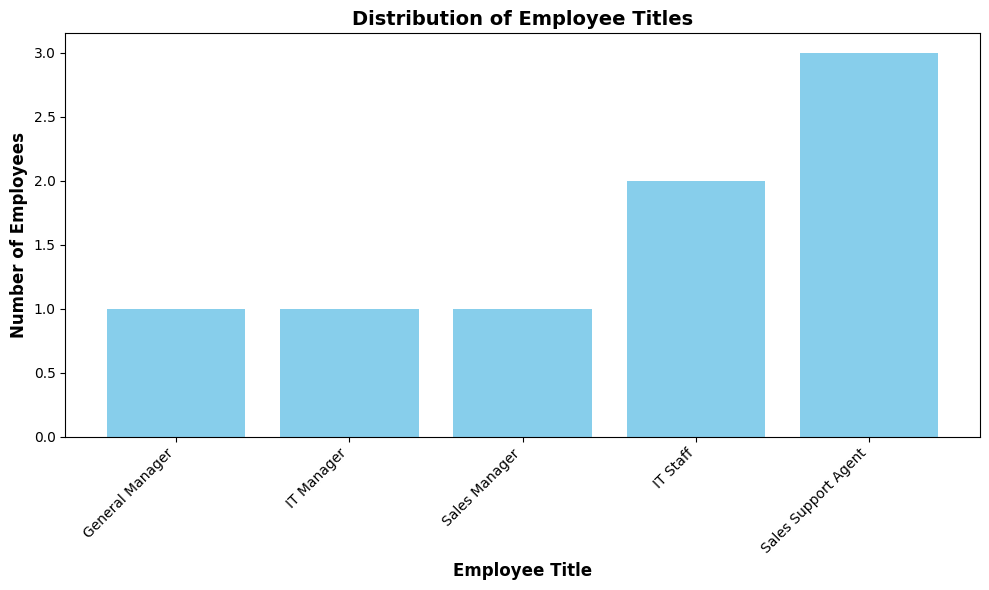

In [49]:
plt.figure(figsize=(10, 6));
plt.bar(employees["Title"], employees["title_count"], color="skyblue");

plt.xlabel('Employee Title', fontsize=12, weight='bold');
plt.ylabel('Number of Employees', fontsize=12, weight='bold');
plt.title('Distribution of Employee Titles', fontsize=14, weight='bold');
plt.xticks(rotation=45, ha='right');
plt.tight_layout();

plt.savefig("dist_employee.png");
plt.show();

## EXTRA CREDIT:
* Use a CTE
* Use a query that joins two or more tables.
* Make a model to see if you can predict something
* Come up with something else cool to do with your data


In [ ]:
# Grab count of GenreId from Tracks and Join with Genre name by GenreId
query = '''
  select GenreId, COUNT(GenreId) as genreid_count
  from tracks
  GROUP BY GenreId ORDER BY GenreId DESC
'''
with db.connect("chinook.db") as db_con:
  gen = pd.read_sql_query( query , db_con).sort_values("genreid_count")


gen

In [ ]:
# Closes the connection
db_con.close()

#### Model Ideas
- Regression Models: Predict total sales based on features like genre popularity, artist fame, release date

## Notes/Ref
- [2D](https://colab.research.google.com/drive/1SLqymfmc4SrgD7NJTFgJM-f9fQ0kLO0-)
- [2f](https://colab.research.google.com/drive/1enk9f0gVMmUG8e467elDVa7BWsrbWcN8#scrollTo=4BMzqqUncjUr)

The [Chinook sample](https://www.sqlitetutorial.net/sqlite-sample-database/)

- Zip file of [sqlite DB](https://www.sqlitetutorial.net/wp-content/uploads/2018/03/chinook.zip)

- [ER diagram](https://www.sqlitetutorial.net/wp-content/uploads/2018/03/sqlite-sample-database-diagram-color.pdf)

- [ER symbols/meanings](https://d2slcw3kip6qmk.cloudfront.net/marketing/pages/chart/erd-symbols/ERD-Notation.PNG)

- [Draw IO](https://app.diagrams.net/) for creating ER diagrams, flowcharts, etc.